# Enterprise Data Science_COVID-19

### Author: Akanksha Parashar
### Matrikelnummer: 423022

## Notebook Description
- This notebook contains the following:
  * A dynamic dashboard of the last cell in the notebook, where one can select the fit for different countries.
  * SIR curve of Italy, Germany and Canada infected cases.
  * Fit of SIR model for Italy, Germany and Canada infected cases.
- The dataset of the COVID-19 is taken from John Hopkins COVID-19 GitHub page.
- The datapath given in this notebook is of user's computer folder where the required csv files are saved.
- The data source is given in the Readme file.

In [36]:
# importing the libraries
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

In [37]:
# try to parse the dates right at the beginning 
# it works out of the box if the date was stored ISO YYYY-MM-DD format
df_analyse=pd.read_csv('C:/Users/hp/Documents/ads_covid_19/data/processed/COVID_small_flat_table.csv',sep=';')  
df_analyse.sort_values('Date',ascending=True).tail()

,Unnamed: 0,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
836,836,2022-05-07,178922,275341,265794,41717,99287,11,7663,9083673,...,899723,238695,7734,522672,10673915,657060,535,11819,320099,248214
837,837,2022-05-08,178981,275366,265798,41717,99287,11,7663,9101319,...,899723,238695,7785,522749,10676184,657060,535,11819,320099,248352
838,838,2022-05-09,179010,275372,265800,41717,99287,11,7663,9101319,...,899723,238736,8056,522749,10678359,657193,535,11819,320157,248536
839,839,2022-05-10,179017,275416,265804,41717,99287,11,7663,9101319,...,902540,238743,8063,522749,10681214,657193,535,11819,320226,248642
840,840,2022-05-11,179131,275440,265806,41717,99287,11,7721,9101319,...,902540,238747,8117,522840,10683972,657193,535,11819,320303,248642


In [38]:
# Extracting data of desired countries
df_an = df_analyse[['Date','Italy','Germany','Canada']]
df_an

,Date,Italy,Germany,Canada
0,2020-01-22,0,0,0
1,2020-01-23,0,0,2
2,2020-01-24,0,0,3
3,2020-01-25,0,0,3
4,2020-01-26,0,0,3
...,...,...,...,...
836,2022-05-07,16767773,25295950,3805916
837,2022-05-08,16798998,25299300,3808060
838,2022-05-09,16816419,25406868,3810247
839,2022-05-10,16872618,25503878,3814635


In [39]:
# Initially, for few dates we have zero cases so we try to to avoid that and start from where we get some regular data
df_an = df_an.iloc[35:,]
df_an

,Date,Italy,Germany,Canada
35,2020-02-26,453,21,20
36,2020-02-27,655,26,22
37,2020-02-28,888,53,28
38,2020-02-29,1128,66,33
39,2020-03-01,1694,117,38
...,...,...,...,...
836,2022-05-07,16767773,25295950,3805916
837,2022-05-08,16798998,25299300,3808060
838,2022-05-09,16816419,25406868,3810247
839,2022-05-10,16872618,25503878,3814635


In [40]:
# set some basic parameters
# beta/gamma is denoted as  'basic reproduction number'

N0=1000000 #max susceptible population
beta=0.4   # infection spread dynamics
gamma=0.1  # recovery rate

# Generating a dataframe of infected, recovered and susceptible population of the selected countries
df = pd.DataFrame()
country_list = ['Italy','Germany','Canada']
for country in country_list:
    I0 = df_an._get_value(35,country)
    S0=N0-I0
    R0=0
    
    dict1 = {'country': country, 'susceptible':S0, 'infected':I0,'recoverd':R0}
                                           
    
    
    df = df.append(dict1, ignore_index=True)
print(df)

   country  infected  recoverd  susceptible
0    Italy     453.0       0.0     999547.0
1  Germany      21.0       0.0     999979.0
2   Canada      20.0       0.0     999980.0


# Simulative approach to calculate SIR curves

In [41]:
# Simulative approach to calculate SIR curves

N0=1000000 #max susceptible population
beta=0.4   # infection spread dynamics
gamma=0.1  # recovery rate


propagation_rates=pd.DataFrame(index = [country],columns={'susceptible':S0,
                                           'infected':I0,
                                           'recoverd':R0})

def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

country_list = ['Italy','Germany','Canada']
for country in country_list:
    I0 = df_an._get_value(35,country)
    S0=N0-I0
    R0=0
    
    SIR=np.array([S0,I0,R0])
    
    for each_t in np.arange(100):
        new_delta_vec=SIR_model(SIR,beta,gamma)
   
        SIR=SIR+new_delta_vec
    
        propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)


        
print(propagation_rates.head())



     susceptible     infected  recoverd country   recovered
0            NaN          NaN       NaN     NaN         NaN
1  999365.882084   588.817916       NaN   Italy   45.300000
2  999130.504269   765.313939       NaN   Italy  104.181792
3  998824.644868   994.641946       NaN   Italy  180.713186
4  998427.255713  1292.566907       NaN   Italy  280.177380


# SIR curve of Italy

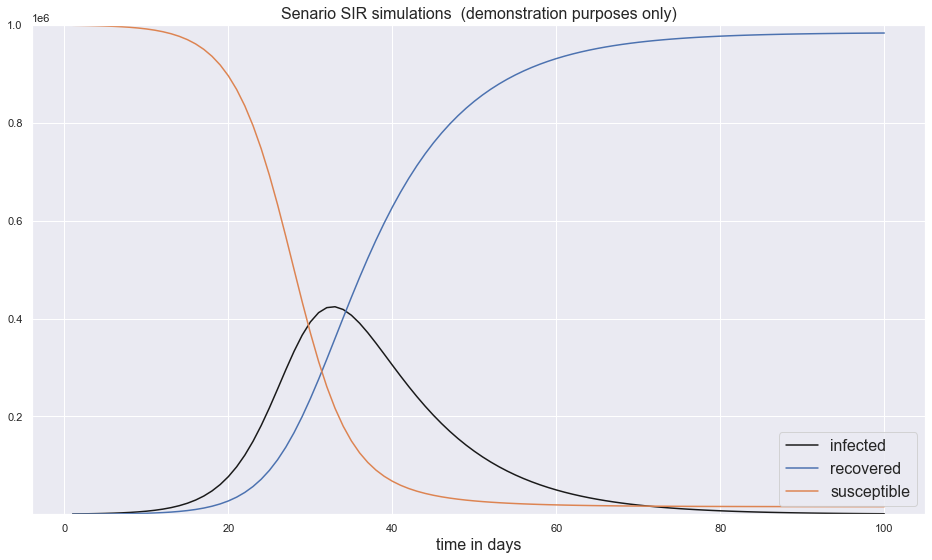

In [42]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(propagation_rates.index[0:101],propagation_rates.infected[0:101],label='infected',color='k')
ax1.plot(propagation_rates.index[0:101],propagation_rates.recovered[0:101],label='recovered')
ax1.plot(propagation_rates.index[0:101],propagation_rates.susceptible[0:101],label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Senario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

# SIR curve of Germany

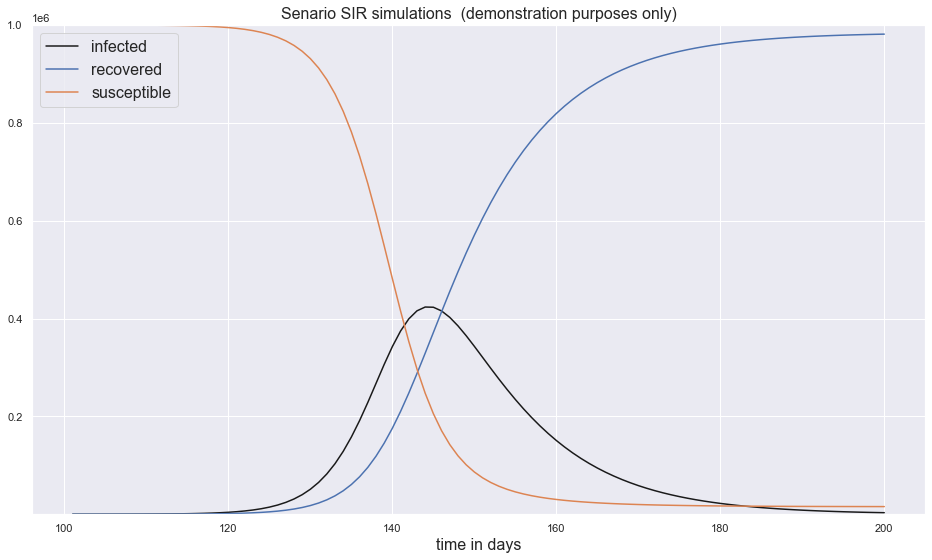

In [43]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(propagation_rates.index[101:201],propagation_rates.infected[101:201],label='infected',color='k')
ax1.plot(propagation_rates.index[101:201],propagation_rates.recovered[101:201],label='recovered')
ax1.plot(propagation_rates.index[101:201],propagation_rates.susceptible[101:201],label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Senario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

# SIR curve of Canada

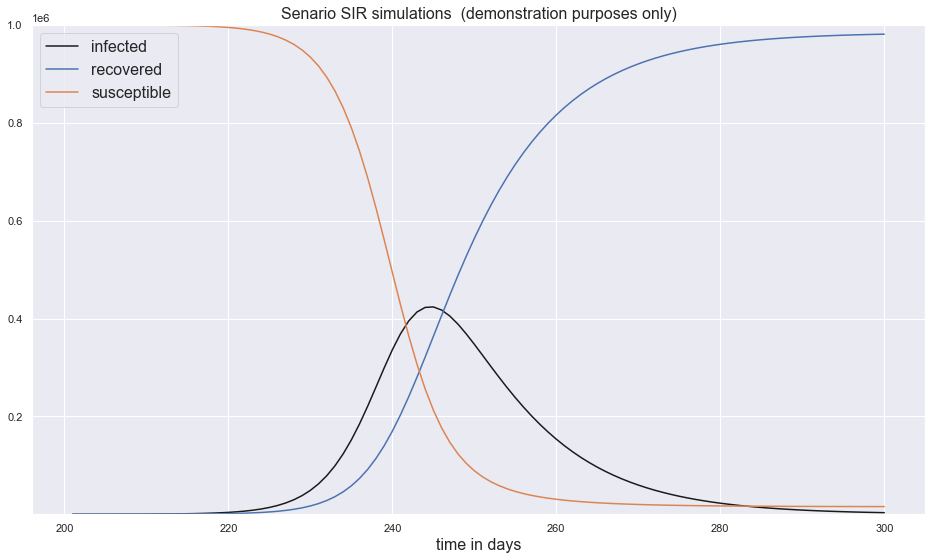

In [44]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(propagation_rates.index[201:301],propagation_rates.infected[201:301],label='infected',color='k')
ax1.plot(propagation_rates.index[201:301],propagation_rates.recovered[201:301],label='recovered')
ax1.plot(propagation_rates.index[201:301],propagation_rates.susceptible[201:301],label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Senario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

# Fitting the parameters of SIR model

In [45]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [46]:
def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI

In [47]:
country_list = ['Italy','Germany','Canada']
df1 = pd.DataFrame()
for country in country_list:
    ydata = np.array(df_analyse[country][35:])
    t = np.arange(len(ydata))
    # ensure re-initialization 
    I0=ydata[0]
    S0=N0-I0
    R0=0
    beta
    
    # example curve of our differential equationa
    popt=[0.4,0.1]
    fit_odeint(t, *popt)
    
    
    popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
    perr = np.sqrt(np.diag(pcov))
    
    print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
    print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
    
    
    # get the final fitted curve
    fitted=fit_odeint(t, *popt)
    df1 = df1.append({'country': country,'t': t, 'ydata':ydata,'fitted':fitted},ignore_index=True)
print(df1.T)

C:\Users\hp\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



standard deviation errors :  [1.24450264e-03 2.52432959e-05]  start infect: 453
Optimal parameters: beta = 0.15235538326228  and gamma =  -0.003471801448666347


<ipython-input-45-16f200073f8a>:16: RuntimeWarning:

overflow encountered in double_scalars

<ipython-input-45-16f200073f8a>:17: RuntimeWarning:

overflow encountered in double_scalars

<ipython-input-45-16f200073f8a>:18: RuntimeWarning:

overflow encountered in double_scalars

C:\Users\hp\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.



standard deviation errors :  [4.30019655e-04 9.10639655e-05]  start infect: 21
Optimal parameters: beta = 0.020401612231379374  and gamma =  -0.0075800326922681625
standard deviation errors :  [2.45273897e-04 2.26546300e-05]  start infect: 20
Optimal parameters: beta = 0.029349097663049287  and gamma =  -0.002738261324148847
                                                         0  \
country                                              Italy   
fitted   [453.0, 529.3473094165105, 618.5543621036619, ...   
t        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
ydata    [453, 655, 888, 1128, 1694, 2036, 2502, 3089, ...   

                                                         1  \
country                                            Germany   
fitted   [21.0, 21.595903684045606, 22.208716692120262,...   
t        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
ydata    [21, 26, 53, 66, 117, 150, 188, 240, 349, 534,...   

                                                   

In [48]:
df1 

,country,fitted,t,ydata
0,Italy,"[453.0, 529.3473094165105, 618.5543621036619, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[453, 655, 888, 1128, 1694, 2036, 2502, 3089, ..."
1,Germany,"[21.0, 21.595903684045606, 22.208716692120262,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[21, 26, 53, 66, 117, 150, 188, 240, 349, 534,..."
2,Canada,"[20.0, 20.65214176001237, 21.325547733609838, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[20, 22, 28, 33, 38, 45, 51, 59, 71, 90, 98, 1..."


In [49]:
# Final dataframe
d_fin = pd.DataFrame({'timeline' : df1.t[0],'Italy_fitted': df1.fitted[0],  'Italy' : df1.ydata[0],
                  'Germany_fitted': df1.fitted[1],  'Germany' : df1.ydata[1],
                  'Canada_fitted': df1.fitted[2], 'Canada' : df1.ydata[2]})

d_fin

,timeline,Italy_fitted,Italy,Germany_fitted,Germany,Canada_fitted,Canada
0,0,4.530000e+02,453,2.100000e+01,21,2.000000e+01,20
1,1,5.293473e+02,655,2.159590e+01,26,2.065214e+01,22
2,2,6.185544e+02,888,2.220872e+01,53,2.132555e+01,28
3,3,7.227844e+02,1128,2.283892e+01,66,2.202091e+01,33
4,4,8.445637e+02,1694,2.348700e+01,117,2.273895e+01,38
...,...,...,...,...,...,...,...
801,801,1.360095e+07,16767773,2.518769e+07,25295950,3.596498e+06,3805916
802,802,1.364825e+07,16798998,2.537934e+07,25299300,3.606359e+06,3808060
803,803,1.369572e+07,16816419,2.557245e+07,25406868,3.616248e+06,3810247
804,804,1.374335e+07,16872618,2.576702e+07,25503878,3.626164e+06,3814635


# Curve of Italy 
- original and fitted infected population

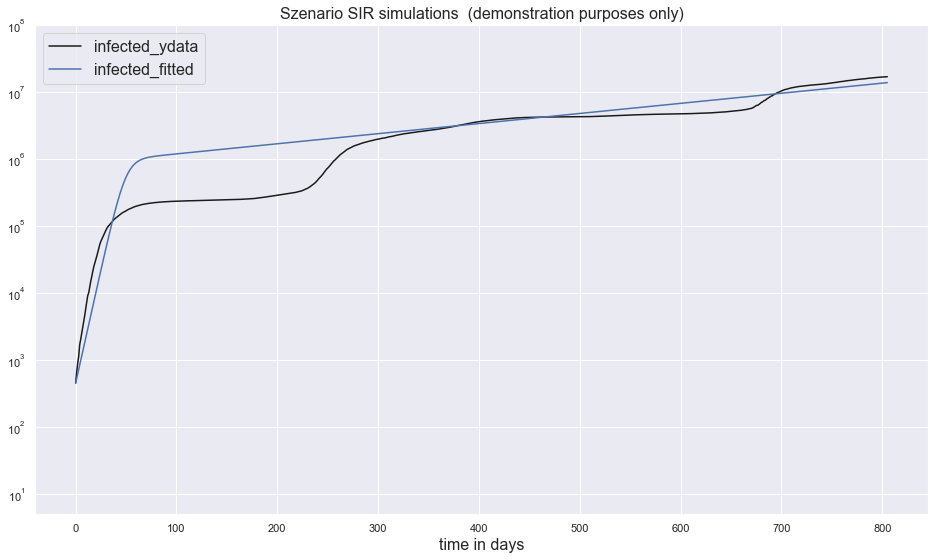

In [50]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(df1.t[0],df1.ydata[0],label='infected_ydata',color='k')
ax1.plot(df1.t[0],df1.fitted[0],label='infected_fitted')

ax1.set_ylim(5, 100000000)
ax1.set_yscale('log')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

# Curve of Germany 
- original and fitted infected population

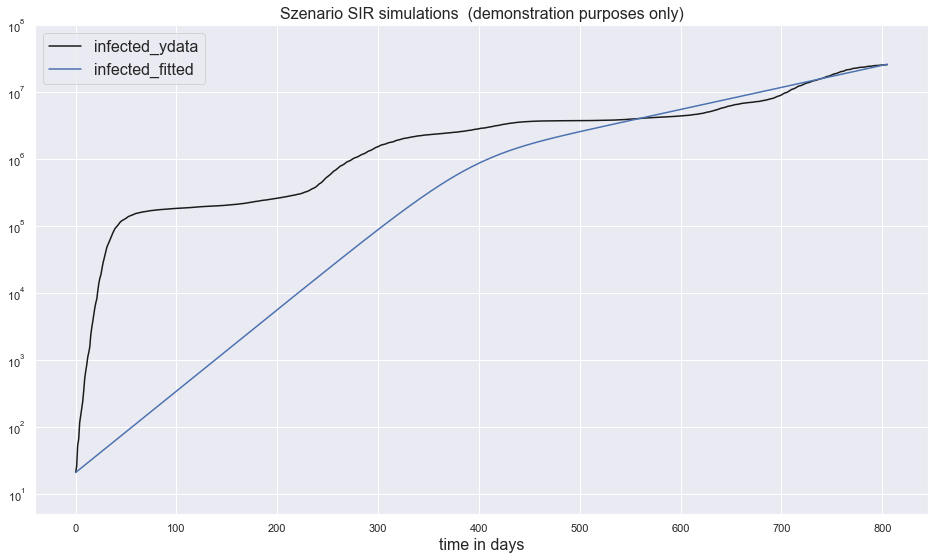

In [51]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(df1.t[1],df1.ydata[1],label='infected_ydata',color='k')
ax1.plot(df1.t[1],df1.fitted[1],label='infected_fitted')

ax1.set_ylim(5, 100000000)
ax1.set_yscale('log')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

# Curve of Canada 
- original and fitted infected population

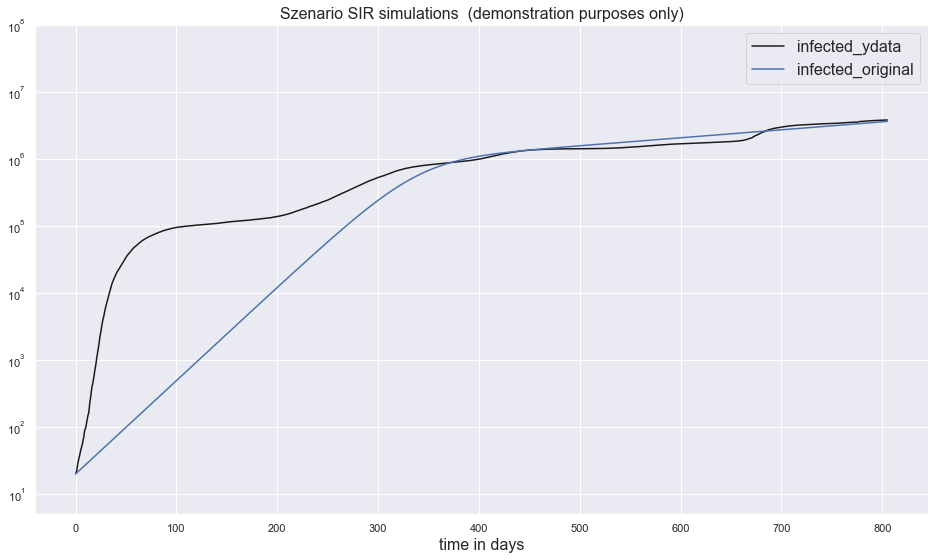

In [52]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(df1.t[2],df1.ydata[2],label='infected_ydata',color='k')
ax1.plot(df1.t[2],df1.fitted[2],label='infected_original')

ax1.set_ylim(5, 100000000)
ax1.set_yscale('log')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

# Dynamic Dashboard
- Using Dash Plotly

In [53]:
country_list = ['Italy', 'Germany','Canada']
country_list

['Italy', 'Germany', 'Canada']

In [54]:
# %load C:/Users/hp/Documents/ads_covid_19/src/visualization/visualize.py
# %load src/visualization/visualize.py
import pandas as pd
import numpy as np

import dash
dash.__version__
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output,State

import plotly.graph_objects as go

import os



fig = go.Figure()

app = dash.Dash()
app.layout = html.Div([
    dcc.Markdown('''
    #  Dynamic Dashboard
    (Using Dash Plotly)

    Goal of the exercise is to select and visualize the fit of different countries.

    '''),
    
   
    html.Br(),
    html.Br(),

    dcc.Dropdown(
        id='country_drop_down',
        options=[ {'label': 'Italy','value':'Italy'},
                  {'label': 'Germany','value':'Germany'},
                  {'label': 'Canada','value':'Canada'}],
        value=['Germany'],# which are pre-selected
        placeholder = 'Multi-Select Country for Visualization',
        multi=True
    ),


    dcc.Graph(figure=fig, id='main_window_slope')
])





In [55]:
@app.callback(Output('main_window_slope', 'figure'),[Input('country_drop_down', 'value')])

def update_figure(country_list):
    
    traces = []
    for each in country_list:
        traces.append(dict(x=d_fin.timeline,y=d_fin[str(each + '_fitted')],mode='markers+lines',opacity=0.9,name=str(each+"_fitted")))
            
        traces.append(dict(x=d_fin.timeline,y=d_fin[each],mode='markers+lines',opacity=0.9,name= str(each+"_ydata")))

    return {
            'data': traces,
            'layout': dict(width=1280,height=720, title = 'Infected along with fit curve',
                            xaxis={'title':'Timeline','tickangle':-45,'nticks':20,'tickfont':dict(size=14,color="#7f7f7f")},
                            yaxis= {'type':"log",'range':'[1.1,5.5]'})}


In [56]:
if __name__ == '__main__':

    app.run_server(port = 4086,debug=True, use_reloader=False)


Dash is running on http://127.0.0.1:4086/

Dash is running on http://127.0.0.1:4086/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
